In [1]:
import sys; sys.path.append('../')

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [90]:
from matplotlib.ticker import MaxNLocator


# Shapelets

In [3]:
sns.set_palette('colorblind')

In [430]:
# Data loc
save_dir = '../experiments/results/pendigits_shapelets'

In [431]:
# Load data
shapelets = torch.load(save_dir + '/old_50/shapelets.pt')
lengths = torch.load(save_dir + '/old_50/lengths.pt')
minimizers = torch.load(save_dir + '/old_50/minimizers.pt')

In [432]:
# To map index to 0 to 9
class_map = torch.argsort(torch.Tensor([8, 2, 1, 4, 6, 0, 5, 9, 7, 3]))

In [113]:
# Remap
shapelets = shapelets[class_map]
lengths = lengths[class_map]
minimizers = minimizers[class_map]

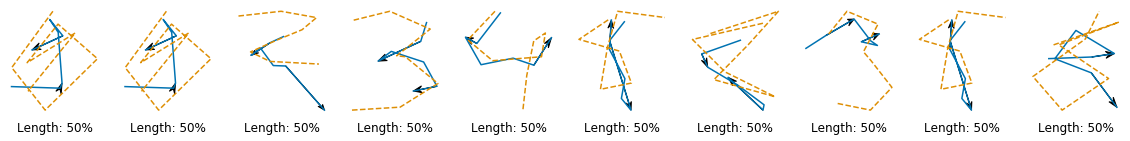

In [114]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    shapelet, minimizer, length = shapelets[i], minimizers[i], lengths[i]
    ax[i].plot(shapelet[:, 0], shapelet[:, 1], label='Learnt shapelet')
    ax[i].plot(minimizer[:, 0], minimizer[:, 1], label='Training set minimizer', ls='--')
    
    # Add an arrow
    xdata, ydata = shapelet[:, 0], shapelet[:, 1]
    arw_i = 3   # Start index of the arrow
    for arw_i in [1, 5]:
        ax[i].arrow(xdata[arw_i], ydata[arw_i], xdata[arw_i+1]-xdata[arw_i], ydata[arw_i+1]-ydata[arw_i], 
                 length_includes_head=True, head_width=0.2, color='black', overhang=0.4)
    
    ax[i].set_title('Length: {:.0f}%'.format(100 * length / 7), y=-0.2)
    
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].axis('off')

plt.savefig('../paper/images/pendigits/old_shapelets_noborder.png', dpi=300, bbox_inches='tight')

# Speech Commands

In [243]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [433]:
# Data loc
save_dir = '../experiments/results/speech_commands_shapelets'

In [442]:
# Load data
shapelets = torch.load(save_dir + '/shapelets.pt')
shapelet_times = torch.load(save_dir + '/shapelet_times.pt')
minimizers = torch.load(save_dir + '/minimizers.pt')
minimizer_times = torch.load(save_dir + '/minimizer_times.pt')
lengths = torch.load(save_dir + '/lengths.pt')

# Get one idx
idx = 0
shapelet = shapelets[idx]
shapelet_times = shapelet_times[idx]
minimizer = minimizers[idx]
minimizer_times = minimizer_times[idx]

In [443]:
# Now get the delta
minimizer_subset = minimizer[(minimizer_times <= shapelet_times[-1]) & (minimizer_times >= shapelet_times[0])]
delta = shapelet - minimizer_subset

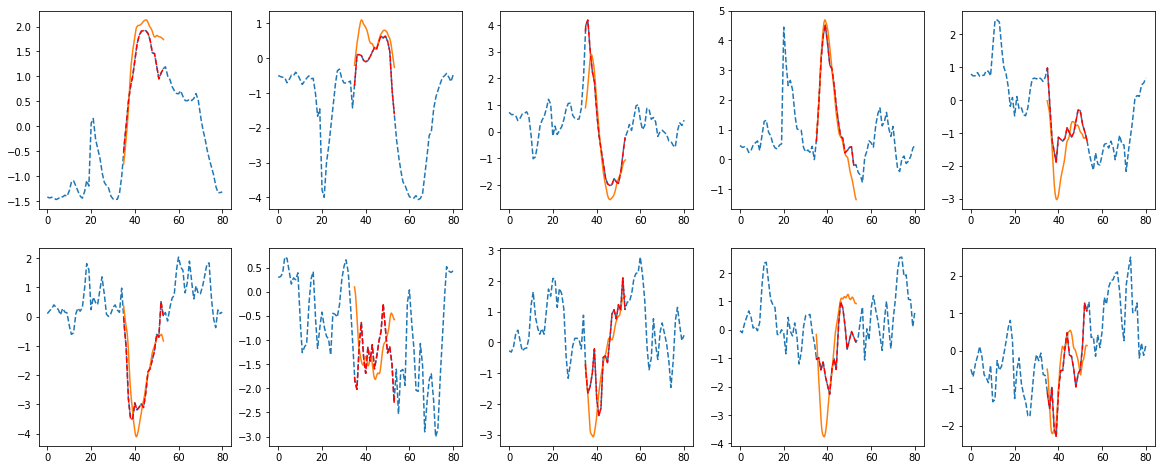

In [444]:
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
ax = ax.ravel()

for i in range(10):
    ix = i 
    ax[i].plot(minimizer_times, minimizer[:, ix], ls='--')
    ax[i].plot(shapelet_times, shapelet[:, ix])
    ax[i].plot(shapelet_times, minimizer_subset[:, ix], color='red', ls='--')

In [445]:
vmin = min(shapelet.min(), minimizer_subset.min(), delta.min())
vmax = max(shapelet.max(), minimizer_subset.max(), delta.max())

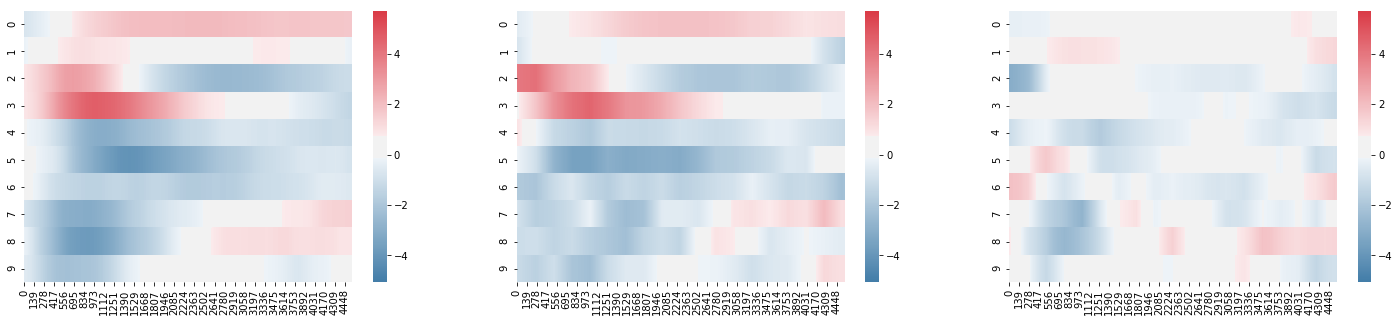

In [446]:
fig, ax = plt.subplots(1, 3, figsize=(25, 5))
cmap = sns.diverging_palette(240, 10, sep=20, n=20, as_cmap=True)
sns.heatmap(shapelet.T[0:10], ax=ax[0], vmin=vmin, vmax=vmax, cmap=cmap)
sns.heatmap(minimizer_subset.T[0:10], ax=ax[1], vmin=vmin, vmax=vmax, cmap=cmap)
sns.heatmap(delta.T[0:10], ax=ax[2], vmin=vmin, vmax=vmax, cmap=cmap)